# 1 Setup API

In [1]:
apikey = 'API KEY'
secret = '`SECRET CODE'

In [2]:
!pip install python-binance pandas mplfinance

In [60]:
# Import Libraries
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager


#Fro Visualization
import pandas as pd
import matplotlib.pyplot as plt

import mplfinance as mpf

%matplotlib inline

# 2 Get Access

In [6]:
client = Client(apikey, secret)

# 3 Get all coin info

In [8]:
available_coin = client.get_all_tickers()
available_coin[2]['price']

'0.00999400'

In [9]:
all_coin_df = pd.DataFrame(available_coin)
all_coin_df.head()

,symbol,price
0,ETHBTC,0.07555300
1,LTCBTC,0.00262400
2,BNBBTC,0.00999400
3,NEOBTC,0.00052300
4,QTUMETH,0.00217000


In [10]:
all_coin_df.shape

(2005, 2)

In [11]:
all_coin_df['symbol'].unique()

array(['ETHBTC', 'LTCBTC', 'BNBBTC', ..., 'FTMEUR', 'GMTGBP', 'ZILTRY'],
      dtype=object)

In [14]:
all_coin_df.set_index('symbol', inplace = True)
all_coin_df

,price
symbol,
ETHBTC,0.07555300
LTCBTC,0.00262400
BNBBTC,0.00999400
NEOBTC,0.00052300
QTUMETH,0.00217000
...,...
BSWETH,0.00038620
FILTRY,321.70000000
FTMEUR,1.17450000


In [17]:
all_coin_df.dtypes

price    object
dtype: object

In [18]:
all_coin_df['price'] = pd.to_numeric(all_coin_df['price'])

In [19]:
all_coin_df.dtypes

price    float64
dtype: object

In [24]:
all_coin_df.describe()

,price
count,2.005000e+03
mean,7.235290e+05
std,2.068219e+07
min,1.000000e-08
25%,3.739000e-04
50%,8.950000e-02
75%,4.506000e+00
max,6.938912e+08


In [25]:
all_coin_df.loc['BTCUSDT']

price    42419.37
Name: BTCUSDT, dtype: float64

# 4 Get Market Depth

In [28]:
#Get Market Depth data for BTCUSDT
depth = client.get_order_book(symbol='BTCUSDT')
depth

{'lastUpdateId': 18418732788,
 'bids': [['42470.93000000', '8.96418000'],
  ['42470.77000000', '1.91230000'],
  ['42470.16000000', '3.37176000'],
  ['42469.70000000', '0.00357000'],
  ['42469.33000000', '0.35308000'],
  ['42469.31000000', '0.21474000'],
  ['42468.97000000', '0.13311000'],
  ['42468.94000000', '0.00884000'],
  ['42468.80000000', '0.04000000'],
  ['42468.61000000', '0.00030000'],
  ['42468.24000000', '0.11770000'],
  ['42467.04000000', '0.23511000'],
  ['42466.68000000', '0.13773000'],
  ['42465.96000000', '0.00037000'],
  ['42465.49000000', '0.04000000'],
  ['42465.38000000', '0.09183000'],
  ['42465.37000000', '0.35311000'],
  ['42464.93000000', '0.23750000'],
  ['42464.74000000', '0.08537000'],
  ['42464.58000000', '0.23464000'],
  ['42464.57000000', '0.02925000'],
  ['42464.56000000', '0.01334000'],
  ['42464.13000000', '0.00030000'],
  ['42464.11000000', '0.05000000'],
  ['42463.64000000', '0.02500000'],
  ['42463.63000000', '0.70123000'],
  ['42463.57000000', '0.35

In [31]:
depth_df = pd.DataFrame(depth['bids'])
depth_df.columns = ['Price','Voume']
depth_df.head()

,Price,Voume
0,42470.93000000,8.96418000
1,42470.77000000,1.91230000
2,42470.16000000,3.37176000
3,42469.70000000,0.00357000
4,42469.33000000,0.35308000


# 5 Get Recent Trade

In [32]:
#BTCUSDT Recent Trade
trades = client.get_recent_trades(symbol='BTCUSDT')
trades

[{'id': 1320971618,
  'price': '42417.96000000',
  'qty': '0.00186000',
  'quoteQty': '78.89740560',
  'time': 1649501242093,
  'isBuyerMaker': False,
  'isBestMatch': True},
 {'id': 1320971619,
  'price': '42417.95000000',
  'qty': '0.00515000',
  'quoteQty': '218.45244250',
  'time': 1649501242126,
  'isBuyerMaker': True,
  'isBestMatch': True},
 {'id': 1320971620,
  'price': '42417.96000000',
  'qty': '0.00612000',
  'quoteQty': '259.59791520',
  'time': 1649501242140,
  'isBuyerMaker': False,
  'isBestMatch': True},
 {'id': 1320971621,
  'price': '42417.96000000',
  'qty': '0.00002000',
  'quoteQty': '0.84835920',
  'time': 1649501242172,
  'isBuyerMaker': False,
  'isBestMatch': True},
 {'id': 1320971622,
  'price': '42417.99000000',
  'qty': '0.00610000',
  'quoteQty': '258.74973900',
  'time': 1649501242172,
  'isBuyerMaker': False,
  'isBestMatch': True},
 {'id': 1320971623,
  'price': '42417.98000000',
  'qty': '0.00165000',
  'quoteQty': '69.98966700',
  'time': 1649501242269

In [36]:
trades_df = pd.DataFrame(trades)
trades_df.head()

,id,price,qty,quoteQty,time,isBuyerMaker,isBestMatch
0,1320971618,42417.96000000,0.00186000,78.89740560,1649501242093,False,True
1,1320971619,42417.95000000,0.00515000,218.45244250,1649501242126,True,True
2,1320971620,42417.96000000,0.00612000,259.59791520,1649501242140,False,True
3,1320971621,42417.96000000,0.00002000,0.84835920,1649501242172,False,True
4,1320971622,42417.99000000,0.00610000,258.74973900,1649501242172,False,True


In [37]:
trades_df.set_index('id',inplace= True)
trades_df

,price,qty,quoteQty,time,isBuyerMaker,isBestMatch
id,,,,,,
1320971618,42417.96000000,0.00186000,78.89740560,1649501242093,False,True
1320971619,42417.95000000,0.00515000,218.45244250,1649501242126,True,True
1320971620,42417.96000000,0.00612000,259.59791520,1649501242140,False,True
1320971621,42417.96000000,0.00002000,0.84835920,1649501242172,False,True
1320971622,42417.99000000,0.00610000,258.74973900,1649501242172,False,True
...,...,...,...,...,...,...
1320972113,42426.02000000,0.02000000,848.52040000,1649501289630,True,True
1320972114,42425.09000000,0.00347000,147.21506230,1649501289658,True,True
1320972115,42424.96000000,0.00030000,12.72748800,1649501289658,True,True


In [41]:
#Change datetime format
trades_df['time'] = pd.to_datetime(trades_df['time']).dt.strftime('%m/%d/%Y')
trades_df

,price,qty,quoteQty,time,isBuyerMaker,isBestMatch
id,,,,,,
1320971618,42417.96000000,0.00186000,78.89740560,01/01/1970,False,True
1320971619,42417.95000000,0.00515000,218.45244250,01/01/1970,True,True
1320971620,42417.96000000,0.00612000,259.59791520,01/01/1970,False,True
1320971621,42417.96000000,0.00002000,0.84835920,01/01/1970,False,True
1320971622,42417.99000000,0.00610000,258.74973900,01/01/1970,False,True
...,...,...,...,...,...,...
1320972113,42426.02000000,0.02000000,848.52040000,01/01/1970,True,True
1320972114,42425.09000000,0.00347000,147.21506230,01/01/1970,True,True
1320972115,42424.96000000,0.00030000,12.72748800,01/01/1970,True,True


# 6 Get Historical Data

In [ ]:
#  [
#   [
#     1499040000000,      // Open time
#     "0.01634790",       // Open
#     "0.80000000",       // High
#     "0.01575800",       // Low
#     "0.01577100",       // Close
#     "148976.11427815",  // Volume
#     1499644799999,      // Close time
#     "2434.19055334",    // Quote asset volume
#     308,                // Number of trades
#     "1756.87402397",    // Taker buy base asset volume
#     "28.46694368",      // Taker buy quote asset volume
#     "17928899.62484339" // Ignore.
#   ]
# ]

## 6.1 Fetch 5min Klines for lastday

In [47]:
# I'll use historical data to analyze in case
# fetch 5 minutes klines for the last day up until now
lastday_klines_5 = client.get_historical_klines("ETHUSDT", Client.KLINE_INTERVAL_5MINUTE, "1 day ago UTC")
lastday_klines_5

[[1649429400000,
  '3262.20000000',
  '3297.53000000',
  '3261.23000000',
  '3289.84000000',
  '5865.87220000',
  1649429699999,
  '19266324.57630300',
  7877,
  '3354.12920000',
  '11020009.10085400',
  '0'],
 [1649429700000,
  '3289.84000000',
  '3304.00000000',
  '3286.56000000',
  '3290.92000000',
  '4060.02040000',
  1649429999999,
  '13378284.51301100',
  6597,
  '2291.89930000',
  '7552982.14302400',
  '0'],
 [1649430000000,
  '3290.92000000',
  '3306.87000000',
  '3289.18000000',
  '3294.81000000',
  '5548.22950000',
  1649430299999,
  '18304281.07393800',
  6377,
  '3522.41430000',
  '11619367.15429400',
  '0'],
 [1649430300000,
  '3294.81000000',
  '3301.10000000',
  '3289.05000000',
  '3291.48000000',
  '2911.29940000',
  1649430599999,
  '9588795.56636000',
  3776,
  '1182.19080000',
  '3893538.74465700',
  '0'],
 [1649430600000,
  '3291.49000000',
  '3292.40000000',
  '3287.98000000',
  '3290.49000000',
  '3318.79390000',
  1649430899999,
  '10923092.77488300',
  3952,
  '

In [48]:
lastday_klines_5_df  = pd.DataFrame(lastday_klines_5)
lastday_klines_5_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1649429400000,3262.20000000,3297.53000000,3261.23000000,3289.84000000,5865.87220000,1649429699999,19266324.57630300,7877,3354.12920000,11020009.10085400,0
1,1649429700000,3289.84000000,3304.00000000,3286.56000000,3290.92000000,4060.02040000,1649429999999,13378284.51301100,6597,2291.89930000,7552982.14302400,0
2,1649430000000,3290.92000000,3306.87000000,3289.18000000,3294.81000000,5548.22950000,1649430299999,18304281.07393800,6377,3522.41430000,11619367.15429400,0
3,1649430300000,3294.81000000,3301.10000000,3289.05000000,3291.48000000,2911.29940000,1649430599999,9588795.56636000,3776,1182.19080000,3893538.74465700,0
4,1649430600000,3291.49000000,3292.40000000,3287.98000000,3290.49000000,3318.79390000,1649430899999,10923092.77488300,3952,2113.27680000,6955862.56256800,0


In [78]:
name_columns = ['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Quote Asset Volume', 
                    'Number of Trades', 'TB Base Volume', 'TB Quote Volume', 'Ignore']
lastday_klines_5_df.columns = name_columns
lastday_klines_5_df.head()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,2022-04-08 14:50:00,3262.20,3297.53,3261.23,3289.84,5865.8722,2022-04-08 14:54:59.999000064,1.926632e+07,7877,3354.1292,1.102001e+07,0
1,2022-04-08 14:55:00,3289.84,3304.00,3286.56,3290.92,4060.0204,2022-04-08 14:59:59.999000064,1.337828e+07,6597,2291.8993,7.552982e+06,0
2,2022-04-08 15:00:00,3290.92,3306.87,3289.18,3294.81,5548.2295,2022-04-08 15:04:59.999000064,1.830428e+07,6377,3522.4143,1.161937e+07,0
3,2022-04-08 15:05:00,3294.81,3301.10,3289.05,3291.48,2911.2994,2022-04-08 15:09:59.999000064,9.588796e+06,3776,1182.1908,3.893539e+06,0
4,2022-04-08 15:10:00,3291.49,3292.40,3287.98,3290.49,3318.7939,2022-04-08 15:14:59.999000064,1.092309e+07,3952,2113.2768,6.955863e+06,0


In [50]:
lastday_klines_5_df.shape

(288, 12)

In [51]:
lastday_klines_5_df.dtypes

Open Time              int64
Open                  object
High                  object
Low                   object
Close                 object
Volume                object
Close Time             int64
Quote Asset Volume    object
Number of Trades       int64
TB Base Volume        object
TB Quote Volume       object
Ignore                object
dtype: object

## 6.2 Fetch 30 mins klines for last month 2021

In [77]:
# fetch 30 minute klines for the last month of 2021
lastmonth_2021_klines = client.get_historical_klines("ETHBTC", Client.KLINE_INTERVAL_30MINUTE, "1 Dec, 2021", "1 Jan, 2022")
lastmonth_2021_klines_df  = pd.DataFrame(lastmonth_2021_klines)
lastmonth_2021_klines_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1638316800000,0.08129800,0.08195300,0.08106200,0.08185700,4814.15930000,1638318599999,392.72225318,12212,3084.01080000,251.58801756,0
1,1638318600000,0.08187100,0.08208100,0.08168100,0.08204200,3290.69870000,1638320399999,269.65254816,7587,1968.50160000,161.31404405,0
2,1638320400000,0.08204600,0.08215000,0.08188400,0.08215000,1677.42230000,1638322199999,137.57921974,4582,943.78280000,77.40944291,0
3,1638322200000,0.08215100,0.08242200,0.08214000,0.08230200,2066.43280000,1638323999999,170.05203462,7201,1259.86070000,103.67576818,0
4,1638324000000,0.08231200,0.08239900,0.08210800,0.08225300,2755.47330000,1638325799999,226.66645989,5853,1092.01330000,89.83181962,0


In [79]:
lastmonth_2021_klines_df.columns = name_columns
lastmonth_2021_klines_df.head()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,1638316800000,0.08129800,0.08195300,0.08106200,0.08185700,4814.15930000,1638318599999,392.72225318,12212,3084.01080000,251.58801756,0
1,1638318600000,0.08187100,0.08208100,0.08168100,0.08204200,3290.69870000,1638320399999,269.65254816,7587,1968.50160000,161.31404405,0
2,1638320400000,0.08204600,0.08215000,0.08188400,0.08215000,1677.42230000,1638322199999,137.57921974,4582,943.78280000,77.40944291,0
3,1638322200000,0.08215100,0.08242200,0.08214000,0.08230200,2066.43280000,1638323999999,170.05203462,7201,1259.86070000,103.67576818,0
4,1638324000000,0.08231200,0.08239900,0.08210800,0.08225300,2755.47330000,1638325799999,226.66645989,5853,1092.01330000,89.83181962,0


In [80]:
lastmonth_2021_klines_df.shape

(1489, 12)

## 6.3 Fetch daily klines for 2022

In [133]:
# fetch 1 day klines for the previous month (Febuary) of 2022
daily_2022_klines = client.get_historical_klines("BTCUSDT", Client.KLINE_INTERVAL_1DAY, "1 Jan 2022")
daily_2022_klines_df  = pd.DataFrame(daily_2022_klines)
daily_2022_klines_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1640995200000,46216.93000000,47954.63000000,46208.37000000,47722.65000000,19604.46325000,1641081599999,924155159.58348650,714899,9942.36679000,468738711.79010650,0
1,1641081600000,47722.66000000,47990.00000000,46654.00000000,47286.18000000,18340.46040000,1641167999999,866610995.56335820,709624,9166.46954000,433182392.28194660,0
2,1641168000000,47286.18000000,47570.00000000,45696.00000000,46446.10000000,27662.07710000,1641254399999,1292203508.32565490,885624,13524.76045000,631879430.11428000,0
3,1641254400000,46446.10000000,47557.54000000,45500.00000000,45832.01000000,35491.41360000,1641340799999,1649170424.12761340,1021815,17689.26808000,821725463.08080750,0
4,1641340800000,45832.01000000,47070.00000000,42500.00000000,43451.13000000,51784.11857000,1641427199999,2334288544.64544840,1478532,23552.99460000,1063287226.35714140,0


In [135]:
daily_2022_klines_df.columns = name_columns
daily_2022_klines_df.tail()
daily_2022_klines_df.shape

(99, 12)

## 6.4 Fetch weekly klines for 2022

In [112]:
# fetch 1 weel klines for the previous month (Febuary) of 2022
weekly_2022_klines = client.get_historical_klines("BTCUSDT", Client.KLINE_INTERVAL_1WEEK, "1 Jan 2022")
weekly_2022_klines_df  = pd.DataFrame(weekly_2022_klines)
weekly_2022_klines_df.columns = name_columns
weekly_2022_klines_df.head()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,1641168000000,47286.18000000,47570.00000000,40501.00000000,41864.62000000,264331.61587000,1641772799999,11564043206.34263770,7717954,128417.56962000,5617721267.31578220,0
1,1641772800000,41864.62000000,44500.00000000,39650.00000000,43071.66000000,232059.06969000,1642377599999,9875457752.62500370,6758442,114555.79525000,4878281491.66561680,0
2,1642377600000,43071.66000000,43505.00000000,34008.00000000,36244.55000000,354513.98432000,1642982399999,13695568421.72647182,9181325,170960.34714200,6607067308.59797929,0
3,1642982400000,36244.55000000,38919.98000000,32917.17000000,37881.76000000,353702.62639100,1643587199999,12907284440.45525624,8716769,179036.24472800,6536472796.36890226,0
4,1643587200000,37881.75000000,42656.00000000,36250.00000000,42380.87000000,258946.95322000,1644191999999,10064164364.24220800,6785864,131038.94536000,5096829006.54884560,0


In [113]:
weekly_2022_klines_df.shape

(14, 12)

# 7 Prepare Historical Data For Viz

## 7.1 Prepare for 5 mins klines lastday

In [52]:
lastday_klines_5_df['Open Time'] = pd.to_datetime(lastday_klines_5_df['Open Time']/1000, unit='s')
lastday_klines_5_df['Close Time'] = pd.to_datetime(lastday_klines_5_df['Close Time']/1000, unit='s')

In [54]:
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Quote Asset Volume', 'TB Base Volume', 'TB Quote Volume']

In [55]:
lastday_klines_5_df[numeric_columns] = lastday_klines_5_df[numeric_columns].apply(pd.to_numeric, axis=1)

In [56]:
lastday_klines_5_df.head()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,2022-04-08 14:50:00,3262.20,3297.53,3261.23,3289.84,5865.8722,2022-04-08 14:54:59.999000064,1.926632e+07,7877,3354.1292,1.102001e+07,0
1,2022-04-08 14:55:00,3289.84,3304.00,3286.56,3290.92,4060.0204,2022-04-08 14:59:59.999000064,1.337828e+07,6597,2291.8993,7.552982e+06,0
2,2022-04-08 15:00:00,3290.92,3306.87,3289.18,3294.81,5548.2295,2022-04-08 15:04:59.999000064,1.830428e+07,6377,3522.4143,1.161937e+07,0
3,2022-04-08 15:05:00,3294.81,3301.10,3289.05,3291.48,2911.2994,2022-04-08 15:09:59.999000064,9.588796e+06,3776,1182.1908,3.893539e+06,0
4,2022-04-08 15:10:00,3291.49,3292.40,3287.98,3290.49,3318.7939,2022-04-08 15:14:59.999000064,1.092309e+07,3952,2113.2768,6.955863e+06,0


In [57]:
lastday_klines_5_df.dtypes

Open Time             datetime64[ns]
Open                         float64
High                         float64
Low                          float64
Close                        float64
Volume                       float64
Close Time            datetime64[ns]
Quote Asset Volume           float64
Number of Trades               int64
TB Base Volume               float64
TB Quote Volume              float64
Ignore                        object
dtype: object

In [59]:
lastday_klines_5_df.describe()

,Open,High,Low,Close,Volume,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume
count,288.000000,288.000000,288.000000,288.000000,288.000000,2.880000e+02,288.000000,288.000000,2.880000e+02
mean,3222.504201,3226.645486,3218.331181,3222.356493,1166.842472,3.767338e+06,2060.937500,574.431533,1.855191e+06
std,25.696545,26.291740,25.429111,25.589236,1210.400947,3.916992e+06,1565.912873,587.334370,1.906994e+06
min,3177.460000,3180.990000,3173.520000,3177.450000,125.108800,4.019943e+05,505.000000,63.809300,2.047674e+05
25%,3205.860000,3209.182500,3203.327500,3205.852500,478.415500,1.534705e+06,1068.750000,225.744400,7.246151e+05
50%,3213.275000,3217.300000,3210.045000,3213.285000,783.486900,2.525271e+06,1480.000000,402.033850,1.294143e+06
75%,3235.520000,3240.545000,3230.652500,3235.502500,1381.647400,4.483534e+06,2600.250000,668.407575,2.167251e+06
max,3294.810000,3306.870000,3289.180000,3294.810000,10121.639500,3.268157e+07,10930.000000,5002.413900,1.614377e+07


## 7.2 Prepare for 30 mins klines last month of 2021

In [81]:
lastmonth_2021_klines_df['Open Time'] = pd.to_datetime(lastmonth_2021_klines_df['Open Time']/1000, unit='s')
lastmonth_2021_klines_df['Close Time'] = pd.to_datetime(lastmonth_2021_klines_df['Close Time']/1000, unit='s')

In [82]:
lastmonth_2021_klines_df[numeric_columns] = lastmonth_2021_klines_df[numeric_columns].apply(pd.to_numeric, axis=1)
lastmonth_2021_klines_df.head()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,2021-12-01 00:00:00,0.081298,0.081953,0.081062,0.081857,4814.1593,2021-12-01 00:29:59.999000064,392.722253,12212,3084.0108,251.588018,0
1,2021-12-01 00:30:00,0.081871,0.082081,0.081681,0.082042,3290.6987,2021-12-01 00:59:59.999000064,269.652548,7587,1968.5016,161.314044,0
2,2021-12-01 01:00:00,0.082046,0.082150,0.081884,0.082150,1677.4223,2021-12-01 01:29:59.999000064,137.579220,4582,943.7828,77.409443,0
3,2021-12-01 01:30:00,0.082151,0.082422,0.082140,0.082302,2066.4328,2021-12-01 01:59:59.999000064,170.052035,7201,1259.8607,103.675768,0
4,2021-12-01 02:00:00,0.082312,0.082399,0.082108,0.082253,2755.4733,2021-12-01 02:29:59.999000064,226.666460,5853,1092.0133,89.831820,0


## 7.3 Prepare 1 day klines for daily 2022

In [136]:
daily_2022_klines_df['Open Time'] = pd.to_datetime(daily_2022_klines_df['Open Time']/1000, unit='s')
daily_2022_klines_df['Close Time'] = pd.to_datetime(daily_2022_klines_df['Close Time']/1000, unit='s')
daily_2022_klines_df[numeric_columns] = daily_2022_klines_df[numeric_columns].apply(pd.to_numeric, axis=1)
daily_2022_klines_df.tail()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
94,2022-04-05,46580.50,47200.00,45353.81,45497.55,42192.74852,2022-04-05 23:59:59.999000064,1.951668e+09,1046080,20607.57735,9.534947e+08,0
95,2022-04-06,45497.54,45507.14,43121.00,43170.47,60849.32936,2022-04-06 23:59:59.999000064,2.700645e+09,1471912,29467.28381,1.307725e+09,0
96,2022-04-07,43170.47,43900.99,42727.35,43444.19,37396.54156,2022-04-07 23:59:59.999000064,1.623879e+09,999816,18567.25999,8.063587e+08,0
97,2022-04-08,43444.20,43970.62,42107.14,42252.01,42375.04203,2022-04-08 23:59:59.999000064,1.830700e+09,1108136,20530.56354,8.871968e+08,0
98,2022-04-09,42252.02,42640.00,42125.48,42445.56,13385.89525,2022-04-09 23:59:59.999000064,5.675003e+08,476093,6622.59230,2.807844e+08,0


## 7.4 Prepare 1 week klines for weekly 2022

In [117]:
weekly_2022_klines_df['Open Time'] = pd.to_datetime(weekly_2022_klines_df['Open Time']/1000, unit='s')
weekly_2022_klines_df['Close Time'] = pd.to_datetime(weekly_2022_klines_df['Close Time']/1000, unit='s')
weekly_2022_klines_df[numeric_columns] = weekly_2022_klines_df[numeric_columns].apply(pd.to_numeric, axis=1)
weekly_2022_klines_df.head()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,2022-01-03,47286.18,47570.00,40501.00,41864.62,264331.615870,2022-01-09 23:59:59.999000064,1.156404e+10,7717954,128417.569620,5.617721e+09,0
1,2022-01-10,41864.62,44500.00,39650.00,43071.66,232059.069690,2022-01-16 23:59:59.999000064,9.875458e+09,6758442,114555.795250,4.878281e+09,0
2,2022-01-17,43071.66,43505.00,34008.00,36244.55,354513.984320,2022-01-23 23:59:59.999000064,1.369557e+10,9181325,170960.347142,6.607067e+09,0
3,2022-01-24,36244.55,38919.98,32917.17,37881.76,353702.626391,2022-01-30 23:59:59.999000064,1.290728e+10,8716769,179036.244728,6.536473e+09,0
4,2022-01-31,37881.75,42656.00,36250.00,42380.87,258946.953220,2022-02-06 23:59:59.999000064,1.006416e+10,6785864,131038.945360,5.096829e+09,0


# 8 Visualization

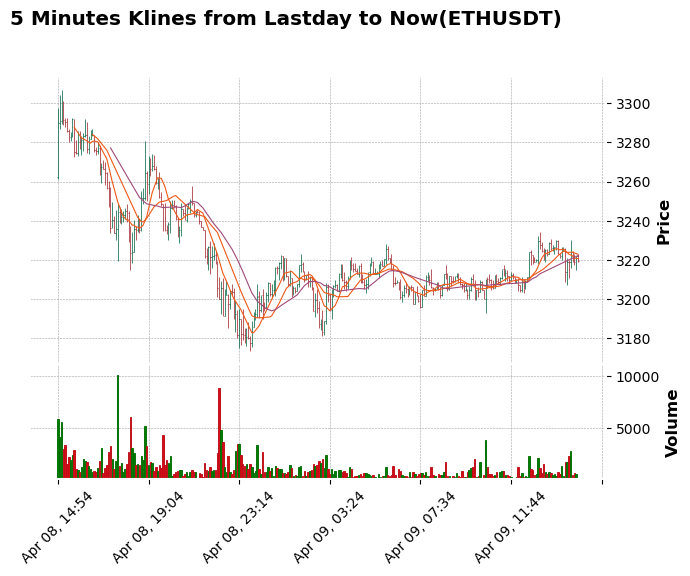

In [84]:
# 5 minutes klines from lastday until now 
mpf.plot(lastday_klines_5_df.set_index('Close Time'),
        style='charles', 
         title = '5 Minutes Klines from Lastday to Now(ETHUSDT)',
        volume=True, 
        mav=(10,20,30))

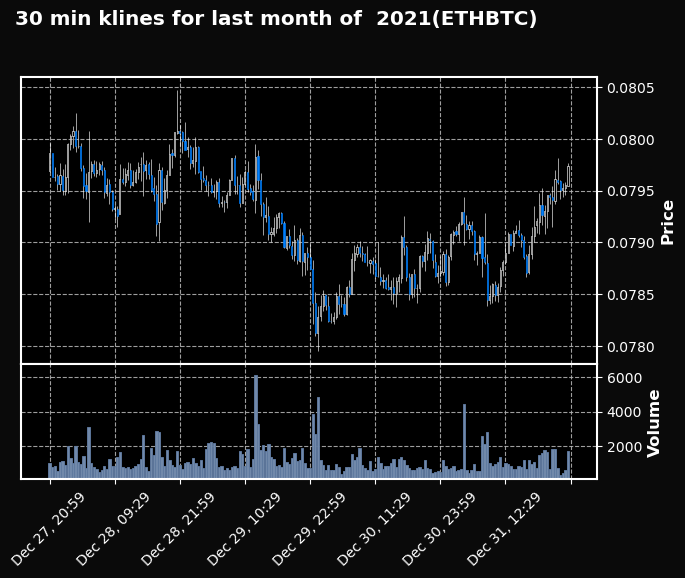

In [99]:
# 30 min klines for last month of  2021
show_lastmonth_2021_df_100 = lastmonth_2021_klines_df.set_index('Close Time').tail(200)
mpf.plot(show_lastmonth_2021_df_100,
        type = 'candle',
         style = 'mike',
         title = '30 min klines for last month of  2021(ETHBTC)',
        volume=True
        )

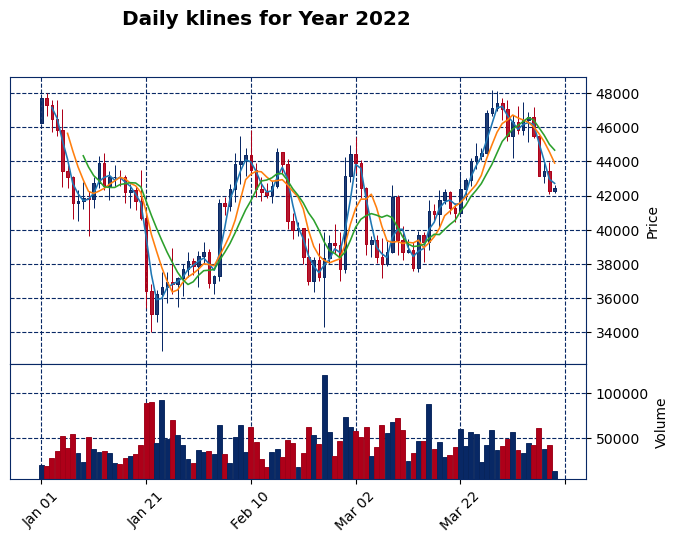

In [142]:
# 1 day  klines for daily of 2022
mpf.plot(daily_2022_klines_df.set_index('Close Time'),
        type = 'candle',
         style = 'starsandstripes',
         title = 'Daily klines for Year 2022',
         volume=True,
         mav=(3,6,9)
        )

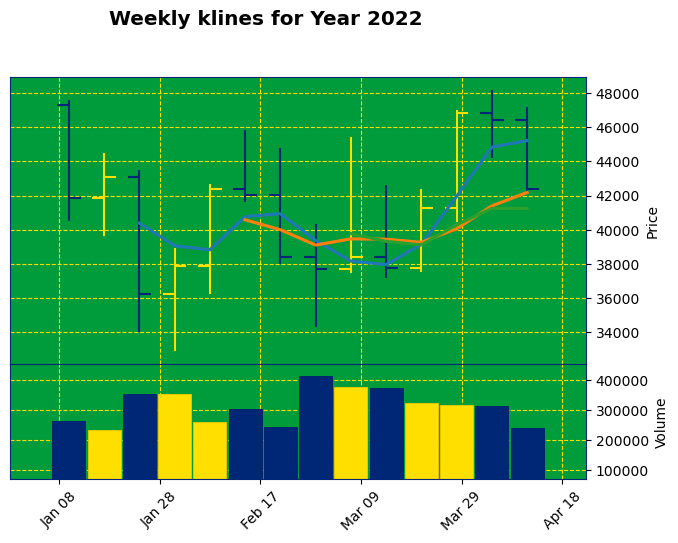

In [128]:
# 1 week  klines for weekly of 2022
mpf.plot(weekly_2022_klines_df.set_index('Close Time'),
        type = 'ohlc',
         style = 'brasil',
         title = 'Weekly klines for Year 2022',
         volume=True,
         mav=(3,6,9),
         show_nontrading=True
        )

In [129]:
# Thank You  😇 
👋 👋 👋 

SyntaxError: invalid character '👋' (U+1F44B) (Temp/ipykernel_13060/3673358180.py, line 2)